In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<h2>The objective is to predict/estimate the insurance charges for clients</h2>

Data description:

    age - age
    sex - sex ['male', 'female']
    bmi: body mass index
    children: number of children
    smoker: smoker ['yes', 'no']
    region: region in country ['northwest', 'northeast', 'southwest', 'southeast']
    charges: cost of insurance

In [2]:
# Create dataframe from csv-format data
df = pd.read_csv("insurance_data.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Print some important information from data (work only for numerical columns)
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h3>We assum:</h3>

Variables of interest: X = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
Target variable to be predicted: y = ['charges']

It is needed to modify some non-encoded values on the variables of interest;
1) For NaN values, whether changing or remove them.
2) For string values, create new ones with numerical values.


In [4]:
# Encoding non-numerical variables
le = LabelEncoder()
df["sex_idx"] = le.fit_transform(df["sex"])
df["smoker_idx"] = le.fit_transform(df["smoker"])
df["region_idx"] = le.fit_transform(df["region"])

In [5]:
# See the modified dataframe
df

,age,sex,bmi,children,smoker,region,charges,sex_idx,smoker_idx,region_idx
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


<h3>Select the variables which will be input for training</h3>

In [6]:
# X represents vector of independent variables
X = df[['age', 'bmi', 'children', 'sex_idx', 'smoker_idx', 'region_idx']]

# y represents vector of the dependent target variable
y = df[['charges']]

In [7]:
# Divide the complete sample in (80%) for training and (20%) for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# We can add the predicted values on the dataframe which contains the *True* values.
test_predictions = model.predict(X_test)
y_test['charges_model'] = test_predictions

# We calculate the error, defined as the difference in between the predicted and True values
# of the target variable.

y_test['model_error'] = y_test.charges - y_test.charges_model

In [10]:
# calculating the score (coeficient of determination, R-squared)
model.score(X_train, y_train)

0.7417049283233981

<h3> Plot for Error in the Test sample </h3>

Text(0, 0.5, 'Error')

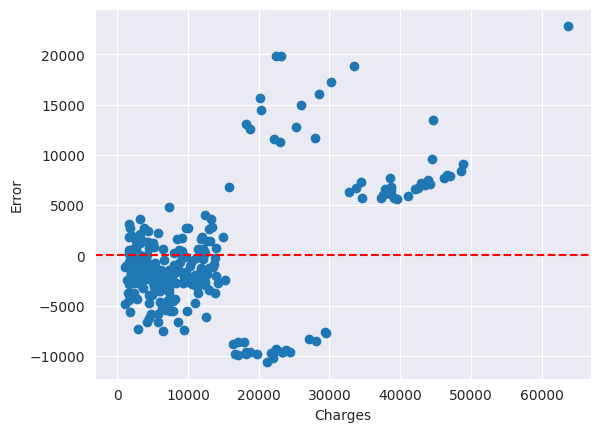

In [11]:
plt.scatter(x=y_test.charges, y=y_test.model_error, color='tab:blue', label='Data')
plt.axline(xy1=(0, 0), slope=0, color='r', linestyle='--')

plt.xlabel("Charges")
plt.ylabel("Error")